In [1]:
'''
Regression Models:
Multi Linear Regression
Polynomial Regression

Dataset:
Load Eligibility

Steps:
1. Read Data
2. Explore Data w/ Graphs (Preprocessing)
3. Feature Scaling (Normalize Data)
4. Create and Train Model
5. Check your prediction
6. Classification Report w/ confusion matrix on model before GridSearchCV
7. GridSearchCV model (Cross Validation)
8. Classification Report w/ confusion matrix
9. ROC Curve
'''

'\nRegression Models:\nMulti Linear Regression\nPolynomial Regression\n\nDataset:\nLoad Eligibility\n\nSteps:\n1. Read Data\n2. Explore Data w/ Graphs (Preprocessing)\n3. Feature Scaling (Normalize Data)\n4. Create and Train Model\n5. Check your prediction\n6. Classification Report w/ confusion matrix on model before GridSearchCV\n7. GridSearchCV model (Cross Validation)\n8. Classification Report w/ confusion matrix\n9. ROC Curve\n'

In [2]:
# We are already familiar with these ones!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler #,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
# importing time to see the time for our grid search
from time import time
# we are going to use the function below for random number generation
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import tree
# Required imports from scikit-learn 
from sklearn.metrics import roc_curve, roc_auc_score







%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

<h1>Exploratory Data Anlaysis</h1>

In [3]:
df = pd.read_csv("train_loan_status.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Counting how many nulls are in the dataframe
df.isnull().sum()
# null credit history to 0
# loanamount to max
# Loan amount terms set to 360 = 30 years
# drop self_employed_na, dependends, gender, loan_amount_term

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:

# New imputed categories
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df['Dependents'] = df['Dependents'].fillna(0)
df.dropna(subset = ["Gender"], inplace=True)
df.dropna(subset = ["Loan_Amount_Term"], inplace=True)
df['LoanAmount'] = df['LoanAmount'].fillna((df['LoanAmount'].max()))
df['Credit_History'] = df['Credit_History'].fillna(0)
df['Married'] = df['Married'].fillna('No')

# Replace null values w/ 0 
# df['Credit_History'].fillna(0, inplace=True)
# df.info()
# # Replacing null values to 

In [9]:
df.value_counts()
# Setting Col
# max_value = df['LoanAmount'].max()
# df['LoanAmount'].fillna(max_value, inplace=True)
# df.isnull().sum()
# df.info()

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001002  Male    No       0           Graduate      No             5849             0.0                650.0       360.0             1.0             Urban          Y              1
LP002361  Male    Yes      0           Graduate      No             1820             1719.0             100.0       360.0             1.0             Urban          Y              1
LP002305  Female  No       0           Graduate      No             4547             0.0                115.0       360.0             1.0             Semiurban      Y              1
LP002308  Male    Yes      0           Not Graduate  No             2167             2400.0             115.0       360.0             1.0             Urban          Y              1
LP002314  Female  No       0           Not Graduate  No             2213             0.0       

In [10]:
# Setting loan_amount_term to 360
# df['Loan_Amount_Term'].fillna(360, inplace=True)
# df.info()

In [11]:
# Dropping remaining rows that have null values
# df.dropna(axis=0, inplace=True)
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,587.000000,587.000000,587.000000,587.000000,587.000000
mean,5324.616695,1622.062896,164.630324,342.010221,0.780239
std,5856.262235,2972.479063,125.966670,65.428333,0.414438
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2885.500000,0.000000,101.500000,360.000000,1.000000
50%,3814.000000,1131.000000,130.000000,360.000000,1.000000
75%,5790.000000,2279.000000,175.500000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


<AxesSubplot:>

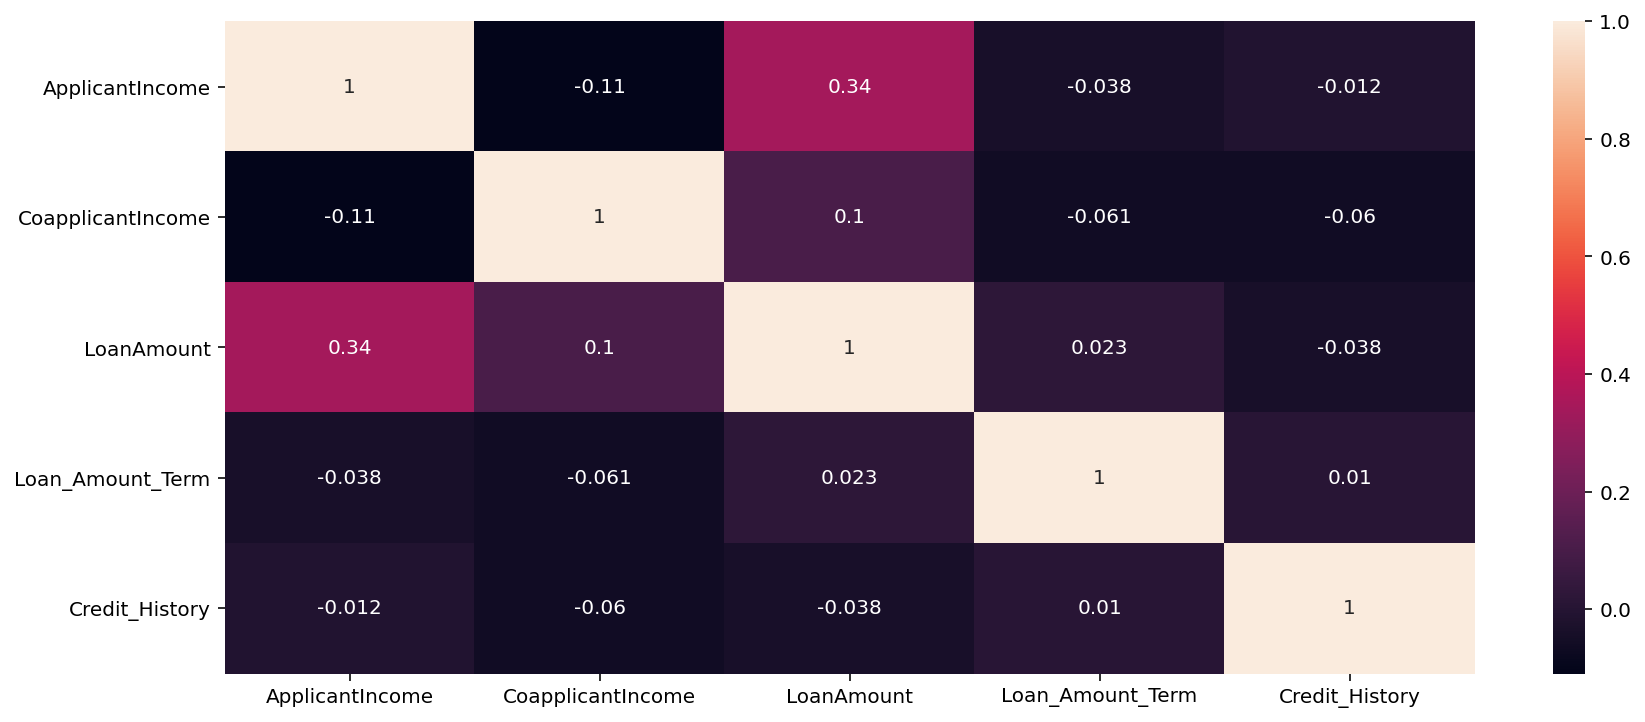

In [13]:
# Exploring data heatmap to see correlations
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True) # annot = True will put the values on the map

In [14]:
# Checking how many Y/N for loan status
df['Loan_Status'].value_counts()

Y    406
N    181
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

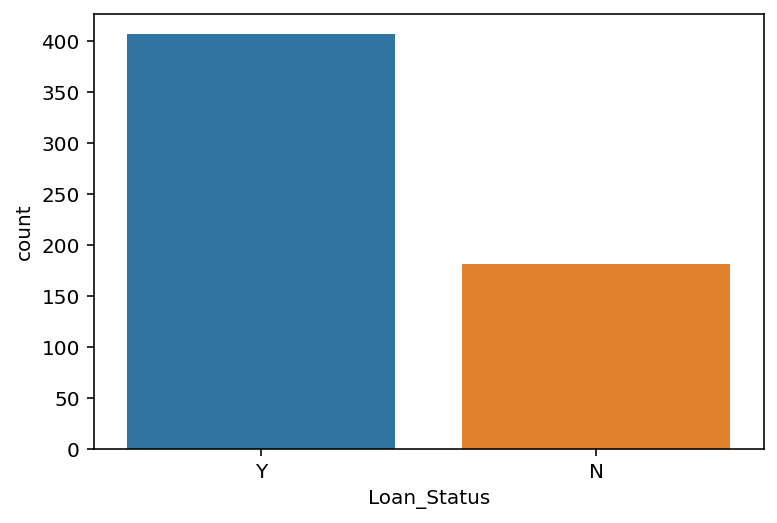

In [15]:
sns.countplot(x='Loan_Status',data=df)

In [16]:
df['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 587, dtype: object

In [17]:
df['Dependents'].value_counts()
df['Dependents'].replace('3+',3,inplace=True)
df['Dependents'].replace('0' ,0, inplace = True)
df['Dependents'].replace('1' ,1, inplace = True)
df['Dependents'].replace('2' ,2, inplace = True)
df['Dependents'].replace('3' ,3, inplace = True)

In [18]:
# Encode Columns

df['Dependents'].replace('3+',3, inplace=True)
df['Dependents'].replace('0' ,0, inplace = True)
df['Dependents'].replace('1' ,1, inplace = True)
df['Dependents'].replace('2' ,2, inplace = True)
df['Dependents'].replace('3' ,3, inplace = True)


# Label Encoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

df['Married'] = le.fit_transform(df['Married'])

df['Education'] = le.fit_transform(df['Education'])

df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

df['Property_Area'] = le.fit_transform(df['Property_Area'])

df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

<h1>Random Forest</h1>

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Instantiate RFC
rfc = RandomForestClassifier(n_estimators=200)

In [21]:
# Initializing X and Y

X = df[['Gender','Married', 'Dependents', 'Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History', 'Property_Area']]
y = df[['Loan_Status']]


In [22]:
# # One Hot Encoding
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,3,4,10])], remainder='passthrough')
# X = ct.fit_transform(X)
# print(X)

In [23]:
#  Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
# Fit RFC
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [25]:
# Predict 
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.6949152542372882

In [26]:
#Classification report w/ Confusion matrix 
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.36      0.45        61
           1       0.72      0.87      0.79       116

    accuracy                           0.69       177
   macro avg       0.66      0.62      0.62       177
weighted avg       0.68      0.69      0.67       177

[[ 22  39]
 [ 15 101]]


<h1>Feature Importance</h1>

In [27]:
# Assiging df cols to feature_names
features_names = X.columns
features_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [28]:
# Function to plot features
def feature_plot(coef, columns, y_title = 'coefficients'):
    feature_imp = pd.DataFrame(coef.T, columns = ['importance'])
    feature_imp['feature'] = columns
    feature_imp.sort_values(by = ['importance'], ascending = False, inplace = True)
    feature_imp.plot(x='feature', kind = 'bar', figsize = (16,4))
    plt.title(y_title)
    plt.ylabel(y_title);


In [29]:
# Feature importance for random forest classifier
rfc.feature_importances_

array([0.02863501, 0.03121057, 0.05757459, 0.03165373, 0.0212524 ,
       0.21173693, 0.13108922, 0.21003907, 0.05760439, 0.1662635 ,
       0.05294058])

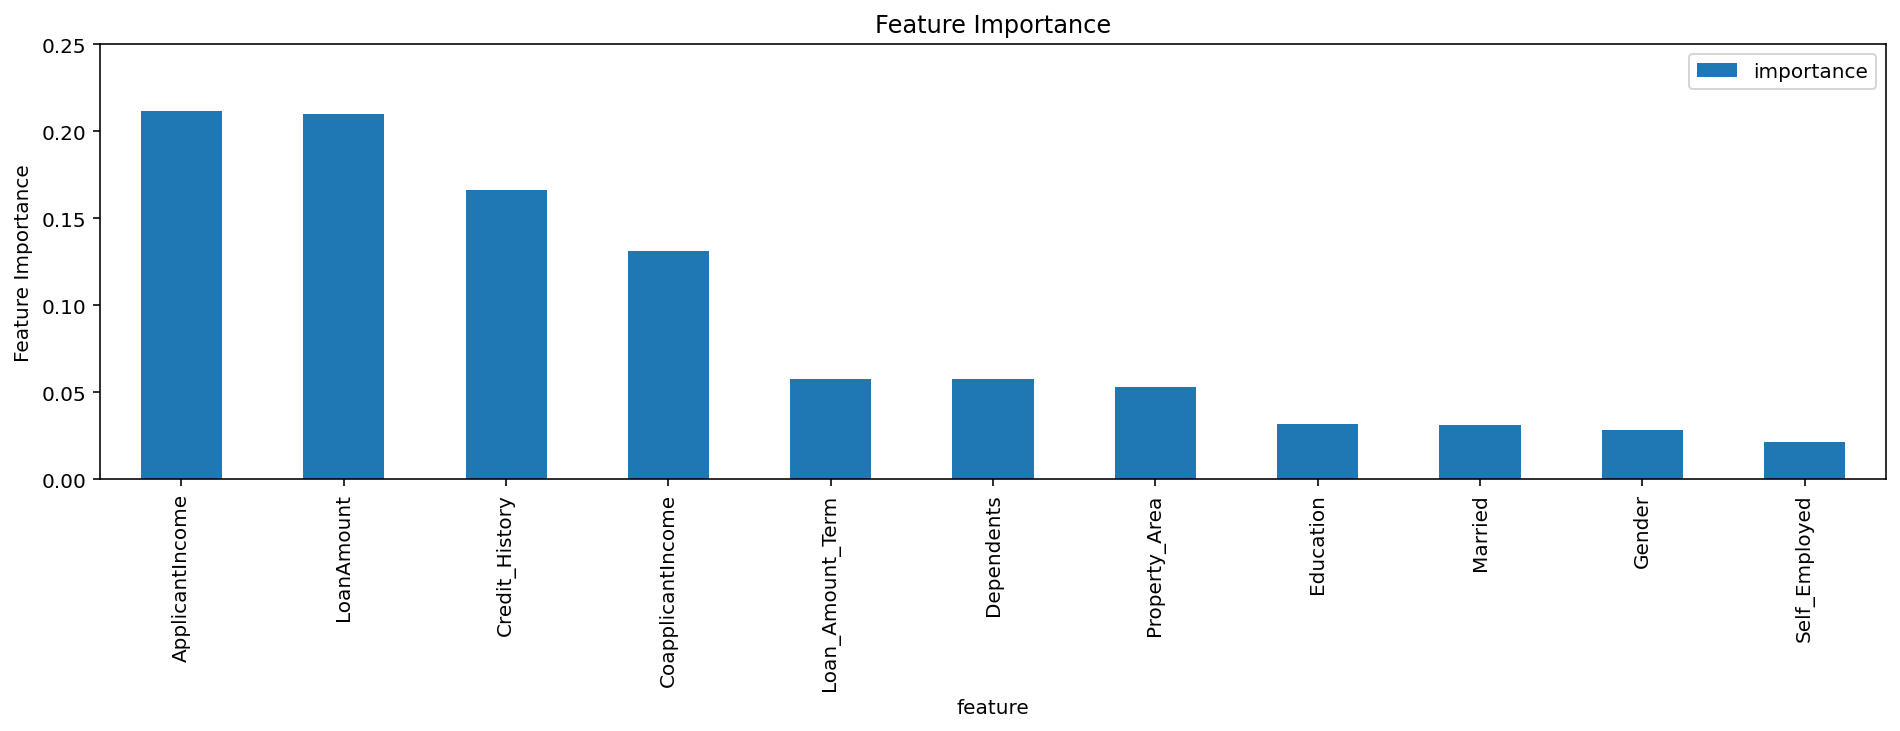

In [30]:
feature_plot(coef = rfc.feature_importances_, columns = features_names, 
             y_title = 'Feature Importance')
plt.ylim(0,0.25);

<h1>GridSearchCV</h1>

In [31]:
rfc_GS = RandomForestClassifier(n_estimators=200) 

In [32]:
param_grid = {"max_depth": [5,11],# try adding None in the list
              "max_features": [3, 5, 11],
              "min_samples_split": [2, 3, 13],
              "criterion": ["gini", "entropy"]}

In [55]:
# run grid search
grid_search_rfc = GridSearchCV(rfc_GS, param_grid=param_grid, cv=5)#, iid=False)
start = time()
grid_search_rfc.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search_rfc.cv_results_['params'])))

GridSearchCV took 36.08 seconds for 36 candidate parameter settings.


In [34]:
print("Best score:", round((grid_search_rfc.best_score_),3))
print("Best params:", grid_search_rfc.best_params_)

Best score: 0.771
Best params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 3, 'min_samples_split': 2}


In [35]:
grid_search_rfc_pred = grid_search_rfc.predict(X_test)

In [36]:
print(confusion_matrix(y_test, grid_search_rfc_pred))
print(classification_report(y_test, grid_search_rfc_pred))

[[ 24  37]
 [ 13 103]]
              precision    recall  f1-score   support

           0       0.65      0.39      0.49        61
           1       0.74      0.89      0.80       116

    accuracy                           0.72       177
   macro avg       0.69      0.64      0.65       177
weighted avg       0.71      0.72      0.70       177



<h1>Randomized Search</h1>

In [37]:
rfc_RS = RandomForestClassifier(n_estimators=200) 

In [38]:
# specifing parameters and distributions to sample from for RandomizedSearchCV 
param_distributions = {"max_depth": [5,11],# max. depth of the tree in Random Forests, try None in the list as well 
                       "max_features": randint(1, 13), # To do: Can you use np.random.randint? if not why? read documentation for both. 
                       "min_samples_split": randint(2, 13), # The minimum no. of samples required to split an internal node
                       "criterion": ["gini", "entropy"]} # we know this as well!

In [39]:
# run randomized search
n_iter_search = 15 

In [40]:
random_search_rfc = RandomizedSearchCV(rfc_RS, param_distributions=param_distributions, 
                                   n_iter=n_iter_search, cv=5)#, iid=False)
# if iid = True, it return the average score across folds, weighted by the number of samples in each test set.

In [41]:
start = time() # current time
random_search_rfc.fit(X_train, y_train) # training 
print("RandomizedSearchCV took {} seconds for {} iterations of searches on given parameter settings.".format(
    round((time() - start),2), n_iter_search))

RandomizedSearchCV took 12.7 seconds for 15 iterations of searches on given parameter settings.


In [42]:
random_search_rfc.best_score_ # gives the best score

0.7707317073170732

In [43]:
random_search_rfc.best_estimator_ # gives the best model

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=4,
                       min_samples_split=3, n_estimators=200)

In [44]:
random_search_rfc.best_params_ # gives the best parameters

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 4,
 'min_samples_split': 3}

In [45]:
# Utility function to report best scores
def print_report(search_results, top_n = 2): # top 2 if top_n not given!
    
    # I want top 5, means 1 to 5, I need to start from 1 using range and add 1 in upper limit (top_n)
    for i in range(1, top_n + 1):
        
        # tow things:
        # Notice, you have 'rank_test_score' in keys above {random_search.cv_results_.keys()}
        # flatnonzero return indices that are non-zero in the flattened version
        # of array random_search_results['rank_test_score']
        rank = np.flatnonzero(search_results['rank_test_score'] == i)

        for val in rank: # val is the index location!
            print("Model rank: ", i)
            print("Mean validation score: {:.3f}".format(search_results['mean_test_score'][val]))
            print("std_test_score: {:.3f}".format(search_results['std_test_score'][val]))
            print("Parameters: {}\n".format(format(search_results['params'][val])))

In [46]:
print_report(random_search_rfc.cv_results_, 3)
# instead create a dataframe and save the results 

Model rank:  1
Mean validation score: 0.771
std_test_score: 0.021
Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 4, 'min_samples_split': 3}

Model rank:  2
Mean validation score: 0.768
std_test_score: 0.019
Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 6, 'min_samples_split': 7}

Model rank:  3
Mean validation score: 0.763
std_test_score: 0.018
Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 3, 'min_samples_split': 12}



In [47]:
random_search_rfc_pred = random_search_rfc.predict(X_test)

In [48]:
c_matrix = confusion_matrix(y_test, random_search_rfc_pred)
print(c_matrix)
print(classification_report(y_test, random_search_rfc_pred))


[[ 23  38]
 [ 12 104]]
              precision    recall  f1-score   support

           0       0.66      0.38      0.48        61
           1       0.73      0.90      0.81       116

    accuracy                           0.72       177
   macro avg       0.69      0.64      0.64       177
weighted avg       0.71      0.72      0.69       177



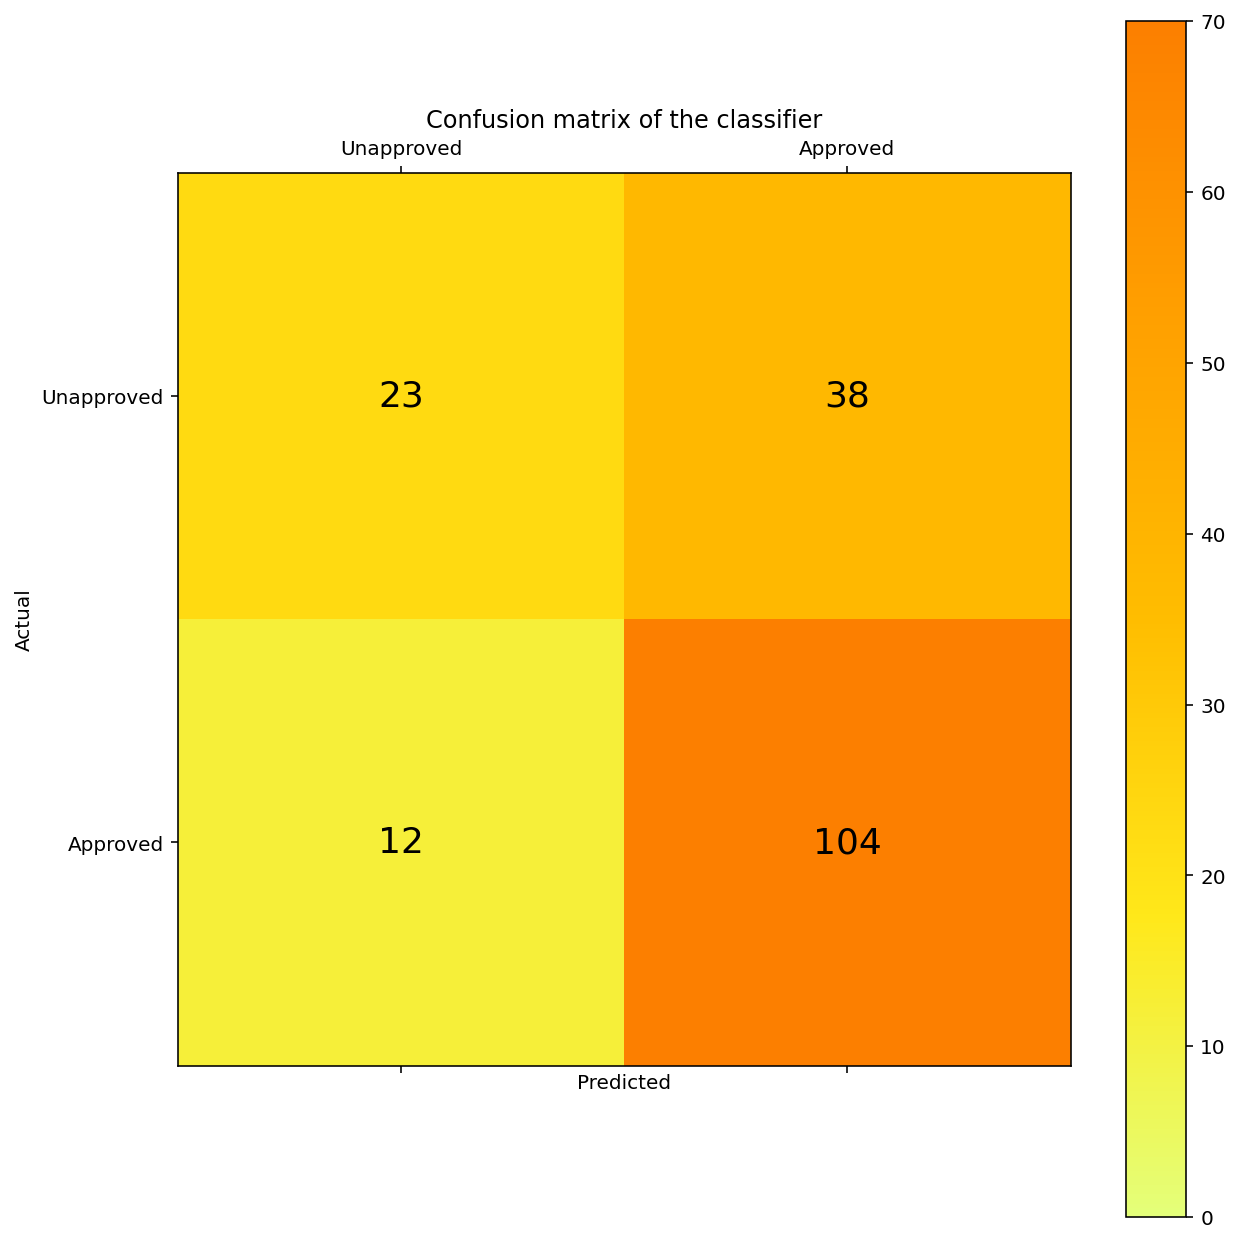

In [49]:
def confusion_matrix_graph(matrix):
    fig = plt.figure(figsize=(10,11))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix,vmin=0, vmax=70, cmap='Wistia')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels(['','Unapproved','Approved'] )
    ax.set_yticklabels(['','Unapproved','Approved'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')    
    for (i, j), z in np.ndenumerate(c_matrix):
        ax.text(j, i, '{:0}'.format(z), ha='center', va='center', color = 'black',fontsize = 18)



confusion_matrix_graph(c_matrix)

<h1>ROC Curve</h1>

In [50]:
# predicting probabilities for each model
rfc_prob = rfc.predict_proba(X_test)
random_search_rfc_prob = random_search_rfc.predict_proba(X_test)
grid_search_rfc_prob = grid_search_rfc.predict_proba(X_test)

In [51]:
# let's check our y_test 
print(y_test)


     Loan_Status
548            0
501            1
408            0
175            1
476            1
..           ...
181            0
282            1
120            1
18             0
82             0

[177 rows x 1 columns]


In [52]:
# Computing Area Under the ROC Curve from prediction scores.

ROC_area_rfc = roc_auc_score(y_test, rfc_prob[:,1]) 
ROC_area_random_search_rfc = roc_auc_score(y_test, random_search_rfc_prob[:,1]) 
ROC_area_grid_search_rfc = roc_auc_score(y_test, grid_search_rfc_prob[:,1]) 

print('Area Under Random Forests ROC Curve: %.3f' % ROC_area_rfc)
print('Area Under Random Search Random Forests ROC Curve: %.3f' % ROC_area_random_search_rfc)
print('Area Under Grid Search Random Forests ROC Curve: %.3f' % ROC_area_grid_search_rfc)

Area Under Random Forests ROC Curve: 0.703
Area Under Random Search Random Forests ROC Curve: 0.686
Area Under Grid Search Random Forests ROC Curve: 0.687


In [53]:
def plot_rocs(y_test, prob, AUC_ROC, ax, title = 'title'):#, y_label = 'y_label', x_label = 'x_label'):
    """
    This is going to be our docstring! Good for your practice
    y_test = test data
    prob = predicted probabilities from our trained model
    AUC_ROC = Area Under ROC Curve
    ax = figure axis on which we want to put our plot
    title = given title
    """
    fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
    
    # plot no skill - A line for random guess
    ax.plot([0, 1], [0, 1], linestyle='--', label = 'Random guess' )
    #plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guess' )
    
    # plot the roc curve for the model
    ax.plot(fpr, tpr, marker='.', label = 'ROC - Area Under The Curve: %.3f' % AUC_ROC)
    
    # let's set the limits (0,1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    # good to put title and labels
    ax.set_title(title)
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    
    # putting the legends  
    ax.legend();

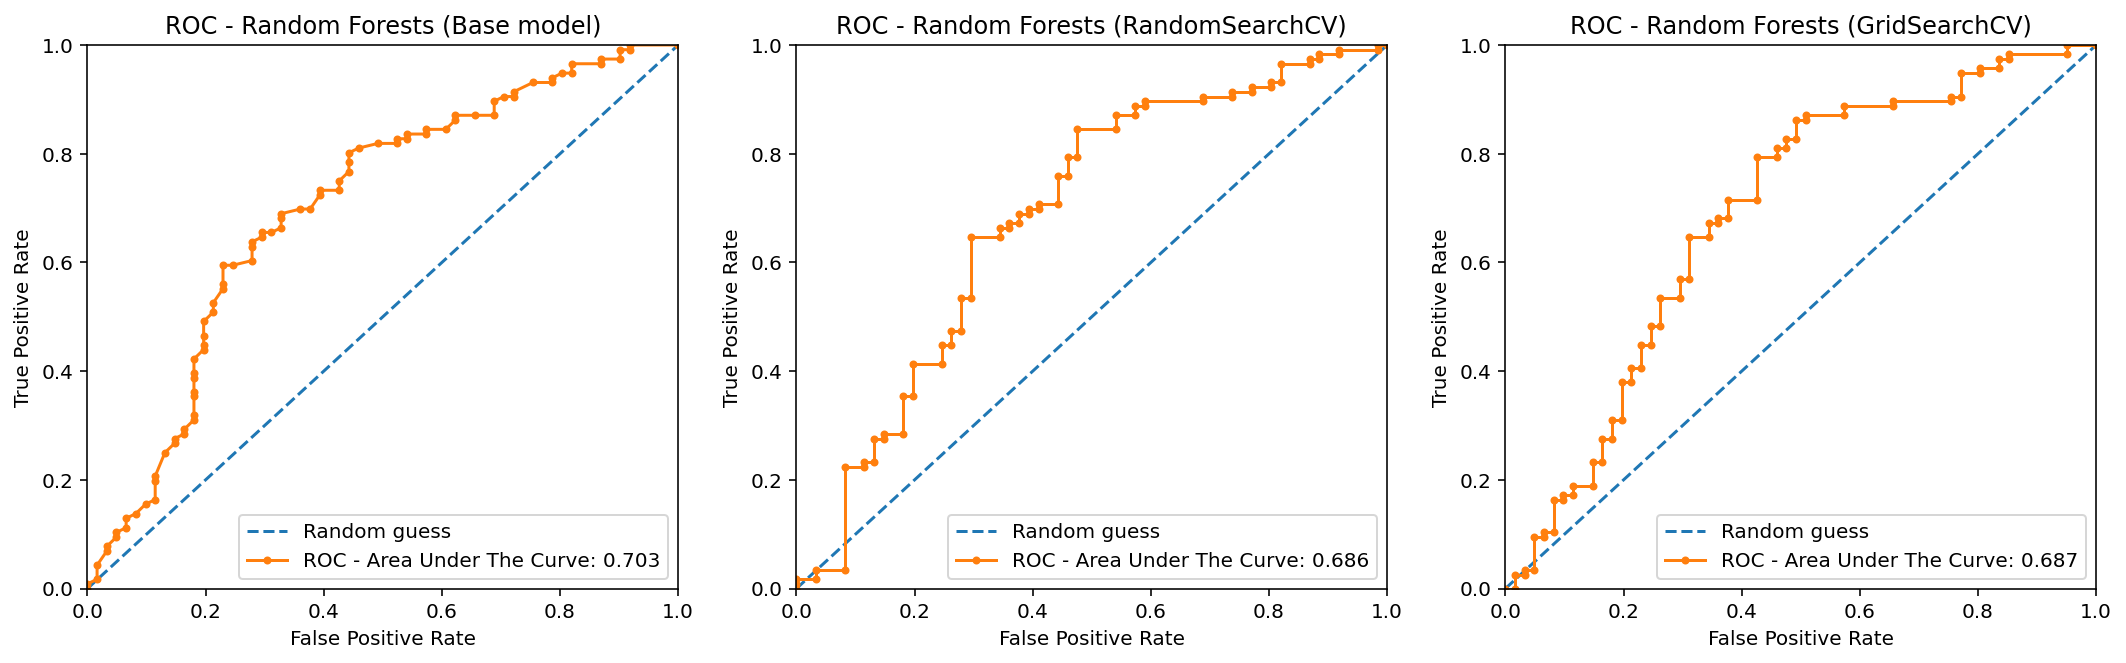

In [54]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

# Calling the above function to get ROC curves for each model
plot_rocs(y_test, rfc_prob, ROC_area_rfc, 
          ax[0], 'ROC - Random Forests (Base model)')

plot_rocs(y_test ,random_search_rfc_prob, ROC_area_random_search_rfc,
          ax[1], 'ROC - Random Forests (RandomSearchCV)')

plot_rocs(y_test, grid_search_rfc_prob, ROC_area_grid_search_rfc, 
          ax[2], 'ROC - Random Forests (GridSearchCV)')